## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")

model = load_model('protopnet', checkpoint_path, device=device)
img_size = 224

# Aggregation methods

## Optimizing one prototype and all patches 

metric: distance | agg_fn: mean | exponent: 1.0
step: 0/500, loss: 10.534618377685547


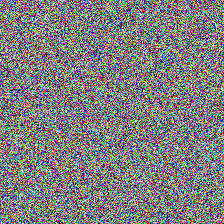

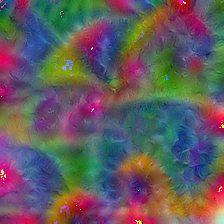

metric: distance | agg_fn: mean | exponent: 2.0
step: 0/500, loss: 113.69547271728516


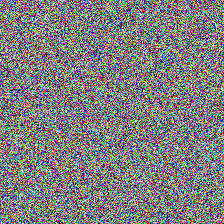

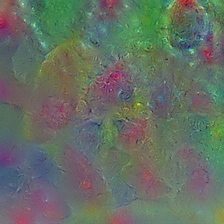

metric: distance | agg_fn: mean_log | exponent: 1.0
step: 0/500, loss: 2.341479778289795


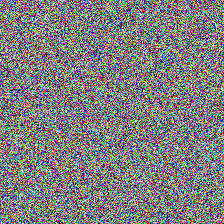

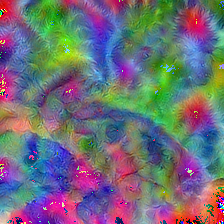

metric: distance | agg_fn: mean_log | exponent: 2.0
step: 0/500, loss: 4.68295955657959


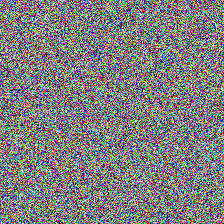

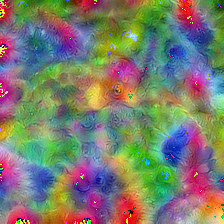

metric: similarity | agg_fn: mean | exponent: 1.0
step: 0/500, loss: -0.09296436607837677


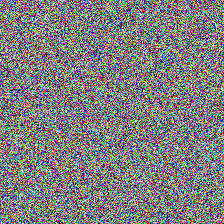

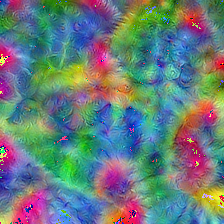

metric: similarity | agg_fn: mean | exponent: 2.0
step: 0/500, loss: 0.008882841095328331


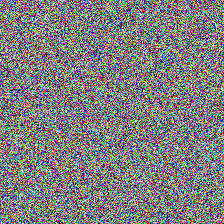

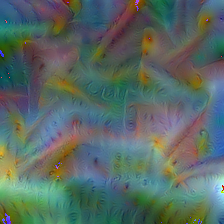

metric: similarity | agg_fn: mean_log | exponent: 1.0
step: 0/500, loss: nan


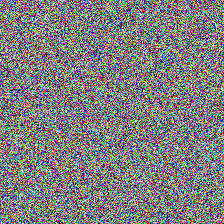

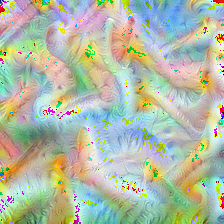

metric: similarity | agg_fn: mean_log | exponent: 2.0
step: 0/500, loss: -4.776884078979492


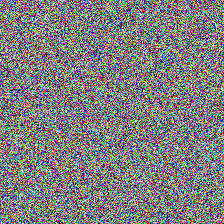

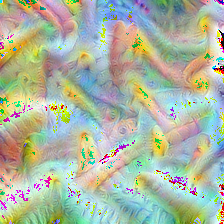

In [4]:
ptypes = [(188,1)]

def before_optim_step(t):
    tt = torch.clamp(t, 0, 1)
    t.data = tfs.GaussianBlur(7, 2)(tt).data

size = (3, 224, 224)
input_tensor = torch.randn(size)   
for metric in ["distance", "similarity"]:
    for agg_fn in ["mean", "mean_log"]:
        for exponent in [1., 2.]:
            print(f"metric: {metric} | agg_fn: {agg_fn} | exponent: {exponent}")
            loss_agg_fn = AggregationFn(metric=metric, agg_fn=agg_fn, exponent=exponent).to(device)
            image = visualize_prototypes(model, ptypes, loss_agg_fn=loss_agg_fn, optimization_steps=500, input_tensor=input_tensor,
                             before_optim_step=before_optim_step, optimizer_kwargs={'lr': 0.2}, print_interval=500)
            pilimg = tfs.ToPILImage()(image)
            display(pilimg)

## Optimizing one prototype and one patch

step: 0/500, loss: 7.1009674072265625


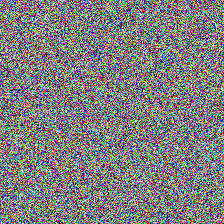

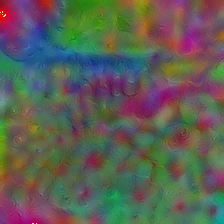

step: 0/500, loss: 8.909561157226562


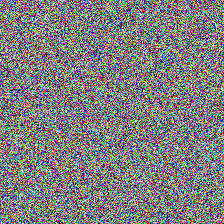

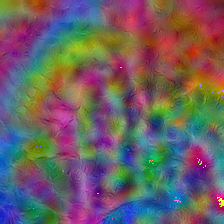

In [5]:
patches_mask1 = torch.zeros(7, 7, dtype=bool)
patches_mask1[0, 0] = True
patches_mask2 = torch.zeros(7, 7, dtype=bool)
patches_mask2[6, 6] = True
for patches_mask in [patches_mask1, patches_mask2]:
    loss_agg_fn = AggregationFn(patches_mask=patches_mask).to(device)
    image = visualize_prototypes(model, ptypes, loss_agg_fn=loss_agg_fn, optimization_steps=500, input_tensor=input_tensor,
                                 before_optim_step=before_optim_step, optimizer_kwargs={'lr': 0.2}, print_interval=500)
    pilimg = tfs.ToPILImage()(image)
    display(pilimg)

## Optimizing all prototypes of one class

ptype_lvl_agg_fn: mean
step: 0/500, loss: 7.63378381729126


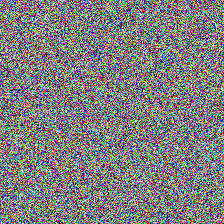

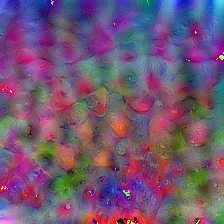

ptype_lvl_agg_fn: mean_log
step: 0/500, loss: 1.7767314910888672


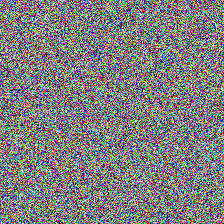

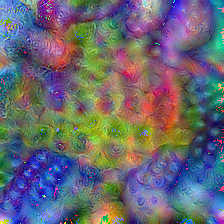

In [6]:
ptypes = [(188,i) for i in range(10)]

for ptype_lvl_agg_fn in ["mean", "mean_log"]:
    print(f"ptype_lvl_agg_fn: {ptype_lvl_agg_fn}")
    loss_agg_fn = AggregationFn(ptype_lvl_agg_fn=ptype_lvl_agg_fn).to(device)
    image = visualize_prototypes(model, ptypes, loss_agg_fn=loss_agg_fn, optimization_steps=500, input_tensor=input_tensor,
                             before_optim_step=before_optim_step, optimizer_kwargs={'lr': 0.2}, print_interval=500)
    pilimg = tfs.ToPILImage()(image)
    display(pilimg)